In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [24]:
img_info=pd.read_csv("./img_info.csv")

In [25]:
#csv에서 흑백 이미지 삭제
ch1_index=img_info[img_info.Channel==1].index
img_info= img_info.drop(ch1_index)
img_info= img_info.reset_index(drop=True)
img_info.Channel.unique()

array([3, 4], dtype=int64)

In [26]:
img_info

,IMG_ID,Category,Extension,Width,Height,Channel,Path
0,aamhfbsxjoqkqsxnnpoy.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\aamhfbsxjoq...
1,aatdcomdixgejmiibsft.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatdcomdixg...
2,aatmmprdzkzdkbfcslkx.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatmmprdzkz...
3,abaoovbyxzqodvhoasko.jpg,L2_10,jpg,2480,3508,3,/Users/User/303/creator_camp/L2_10\abaoovbyxzq...
4,abymagsohyagiheolkhk.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\abymagsohya...
...,...,...,...,...,...,...,...
25492,zslxpqgjoxxxnfcgaqbc.jpg,L2_52,jpg,700,700,3,/Users/User/303/creator_camp/L2_52\zslxpqgjoxx...
25493,ztedlwqpolocumvrpkdt.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\ztedlwqpolo...
25494,zukfkicrimhykqtrxkbe.png,L2_52,png,700,700,3,/Users/User/303/creator_camp/L2_52\zukfkicrimh...
25495,zvpheaqohuqevixkjspd.jpg,L2_52,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_52\zvpheaqohuq...


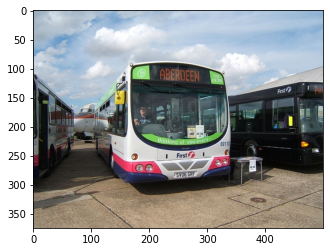

In [62]:
img=cv2.imread(img_info.Path[1894])
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
#따흐흑

In [36]:
data=np.load('./64x64_전체데이터_흑백제외.npy')
data=data.reshape(-1,64*64*3)
data.shape

(25497, 12288)

In [37]:
model=KMeans(n_clusters=2,random_state=0,max_iter=1000)
model.fit(data)
labels = model.labels_
len(labels)

25497

In [55]:
# csv 복사본 생성
result=img_info.copy()
result['class']=labels
result['class'].unique()

array([0, 1])

In [45]:
#0-> 정상 군집
label0 =result[result['class']==0]
label0=label0.reset_index(drop=True)
label0

,IMG_ID,Category,Extension,Width,Height,Channel,Path,class
0,aamhfbsxjoqkqsxnnpoy.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\aamhfbsxjoq...,0
1,aatdcomdixgejmiibsft.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatdcomdixg...,0
2,aatmmprdzkzdkbfcslkx.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\aatmmprdzkz...,0
3,abaoovbyxzqodvhoasko.jpg,L2_10,jpg,2480,3508,3,/Users/User/303/creator_camp/L2_10\abaoovbyxzq...,0
4,abymagsohyagiheolkhk.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\abymagsohya...,0
...,...,...,...,...,...,...,...,...
23145,zslxpqgjoxxxnfcgaqbc.jpg,L2_52,jpg,700,700,3,/Users/User/303/creator_camp/L2_52\zslxpqgjoxx...,0
23146,ztedlwqpolocumvrpkdt.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\ztedlwqpolo...,0
23147,zukfkicrimhykqtrxkbe.png,L2_52,png,700,700,3,/Users/User/303/creator_camp/L2_52\zukfkicrimh...,0
23148,zvpheaqohuqevixkjspd.jpg,L2_52,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_52\zvpheaqohuq...,0


In [46]:
#1-> 삭제 군집
label1 =result[result['class']==1]
label1=label1.reset_index(drop=True)
label1

,IMG_ID,Category,Extension,Width,Height,Channel,Path,class
0,adketuwinjndjaqrrzho.jpg,L2_10,jpg,300,300,3,/Users/User/303/creator_camp/L2_10\adketuwinjn...,1
1,amciivgxjoagcydlzvot.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\amciivgxjoa...,1
2,amcwcxodzpllfnrxryze.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\amcwcxodzpl...,1
3,amixvvxcbjsunejbypqu.jpg,L2_10,jpg,700,700,3,/Users/User/303/creator_camp/L2_10\amixvvxcbjs...,1
4,ayfkbqycvxosdoorkiii.jpg,L2_10,jpg,1200,1200,3,/Users/User/303/creator_camp/L2_10\ayfkbqycvxo...,1
...,...,...,...,...,...,...,...,...
2342,zsqaspxigrhecsmaaggl.jpg,L2_50,jpg,500,493,3,/Users/User/303/creator_camp/L2_50\zsqaspxigrh...,1
2343,zudkxopuxiiuknlkxjub.jpg,L2_50,jpg,375,500,3,/Users/User/303/creator_camp/L2_50\zudkxopuxii...,1
2344,zxsifwdqfazxzpvvbfxq.jpg,L2_50,jpg,375,500,3,/Users/User/303/creator_camp/L2_50\zxsifwdqfaz...,1
2345,sioiqglbzlkybnmomiun.png,L2_52,png,700,700,4,/Users/User/303/creator_camp/L2_52\sioiqglbzlk...,1


In [48]:
#클래스별 개수
label0.groupby('Category')["IMG_ID"].count()

Category
L2_10    1785
L2_12     120
L2_15    1358
L2_20     398
L2_21     409
L2_24     419
L2_25    6120
L2_27     424
L2_3      200
L2_30     361
L2_33    6174
L2_34     419
L2_39     444
L2_40     179
L2_41     205
L2_44     529
L2_45     615
L2_46    2207
L2_50     404
L2_52     380
Name: IMG_ID, dtype: int64

In [56]:
#클래스별 개수
label1.groupby('Category')["IMG_ID"].count()

Category
L2_10    108
L2_12    398
L2_15    151
L2_20     12
L2_21      1
L2_24    362
L2_25     69
L2_27      2
L2_3     395
L2_30      1
L2_33     32
L2_39     10
L2_40      1
L2_41    388
L2_44     18
L2_45     13
L2_46      7
L2_50    377
L2_52      2
Name: IMG_ID, dtype: int64

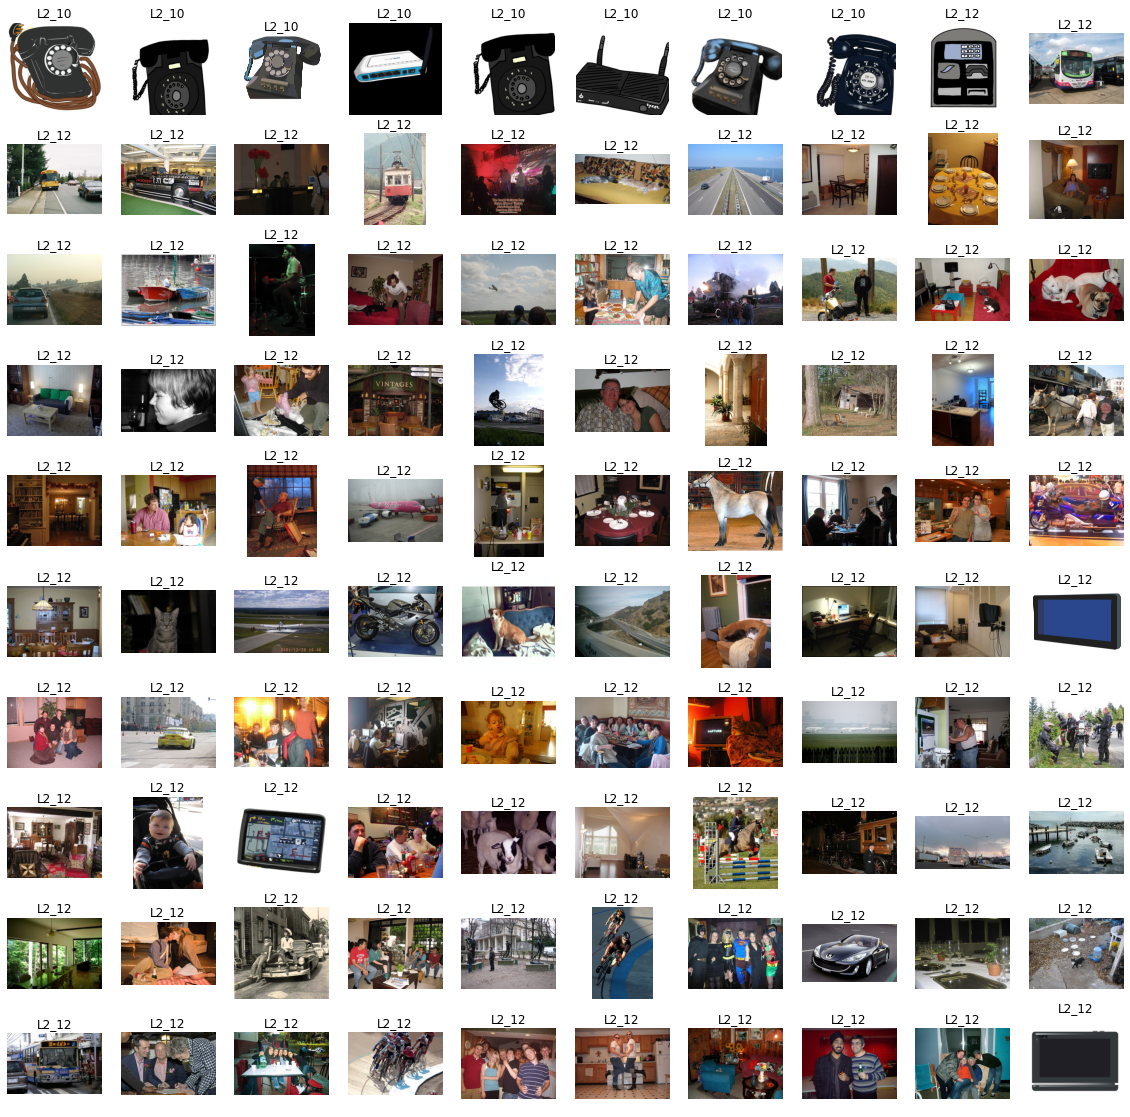

In [66]:
#삭제 군집 이미지 출력
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  img=cv2.imread(label1.Path[i+100])
  img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(label1.Category[i+100])
  plt.axis('off')
plt.show()

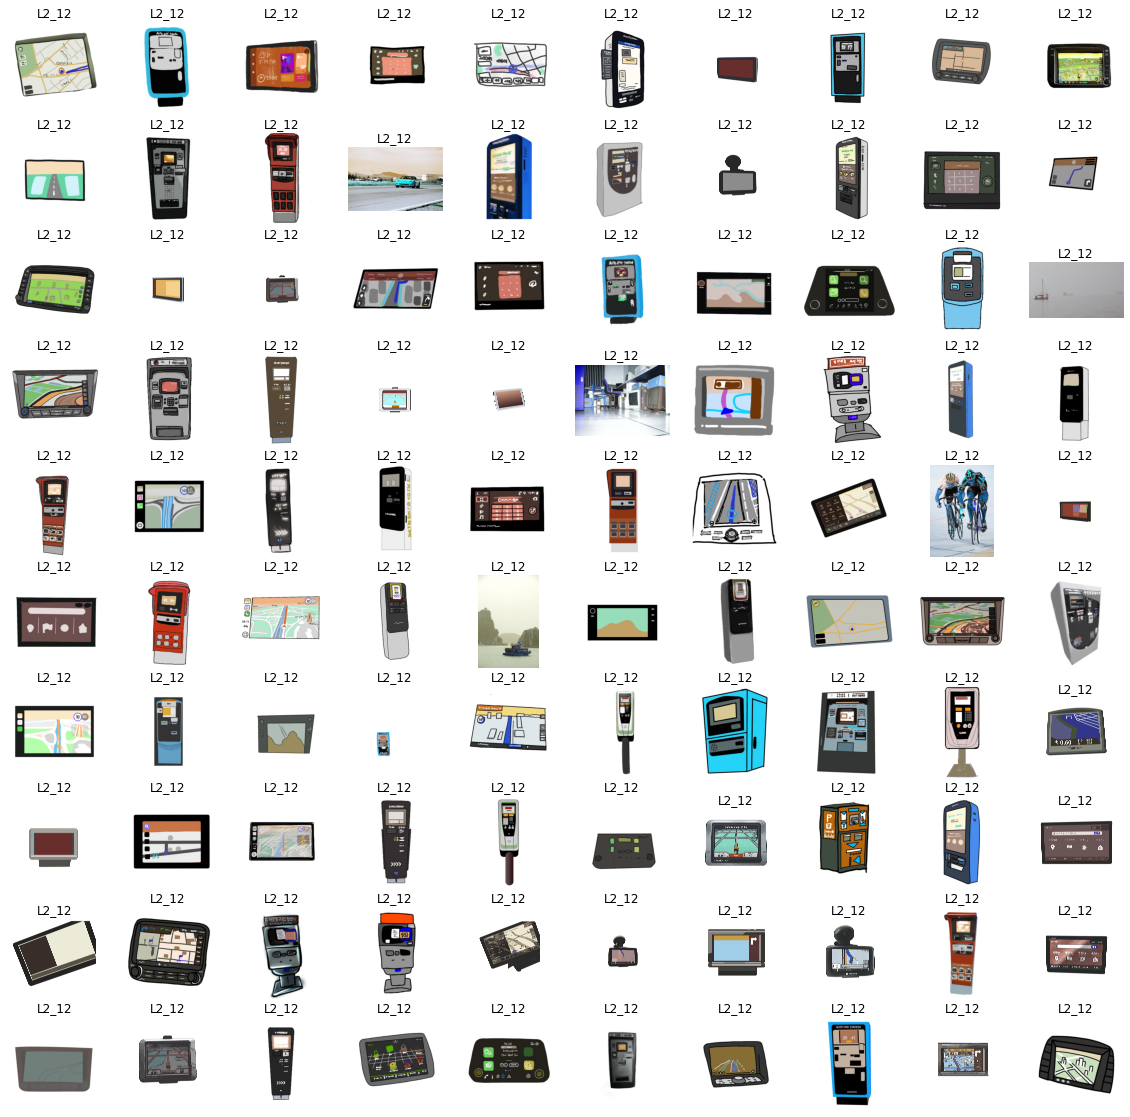

In [65]:
#정상 군집 이미지 출력
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  img=cv2.imread(label0.Path[i+1800])
  plt.imshow(img)
  plt.title(label0.Category[i+1800])
  plt.axis('off')
plt.show()